
<img src="https://m1.quebecormedia.com/emp/emp/bender8175858f-7dbd-4927-85c5-85557e800b98_ORIGINAL.jpg?impolicy=crop-resize&x=0&y=0&w=1000&h=745&width=925&height=925" style="float: left; margin: 30px; height: 75px">

# Predicting H1N1 and Seasonal Flu Vaccination
## Graphs used in the Presentation 
### Lavanya Acharya , Katrin Ayrapetov, Sean Li


<font style="font-size: 2rem; color: blue">


 
</font>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import model_selection

from sklearn import ensemble
from sklearn import metrics
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier

## Graphs for Data Insights

In [26]:
labels = pd.read_csv('../data/training_set_labels.csv')

In [27]:
features = pd.read_csv('../data/training_set_features.csv')


In [28]:
data_not_clean = pd.merge(left=features, right=labels, on='respondent_id')

In [30]:
data_not_clean.seasonal_vaccine.value_counts(normalize=True)

0    0.534392
1    0.465608
Name: seasonal_vaccine, dtype: float64

In [5]:
page_num = pd.read_csv('../data/page_num.csv')


In [6]:
page_num["Percent_null"] = (page_num["Number of Nulls"]/26707)*100

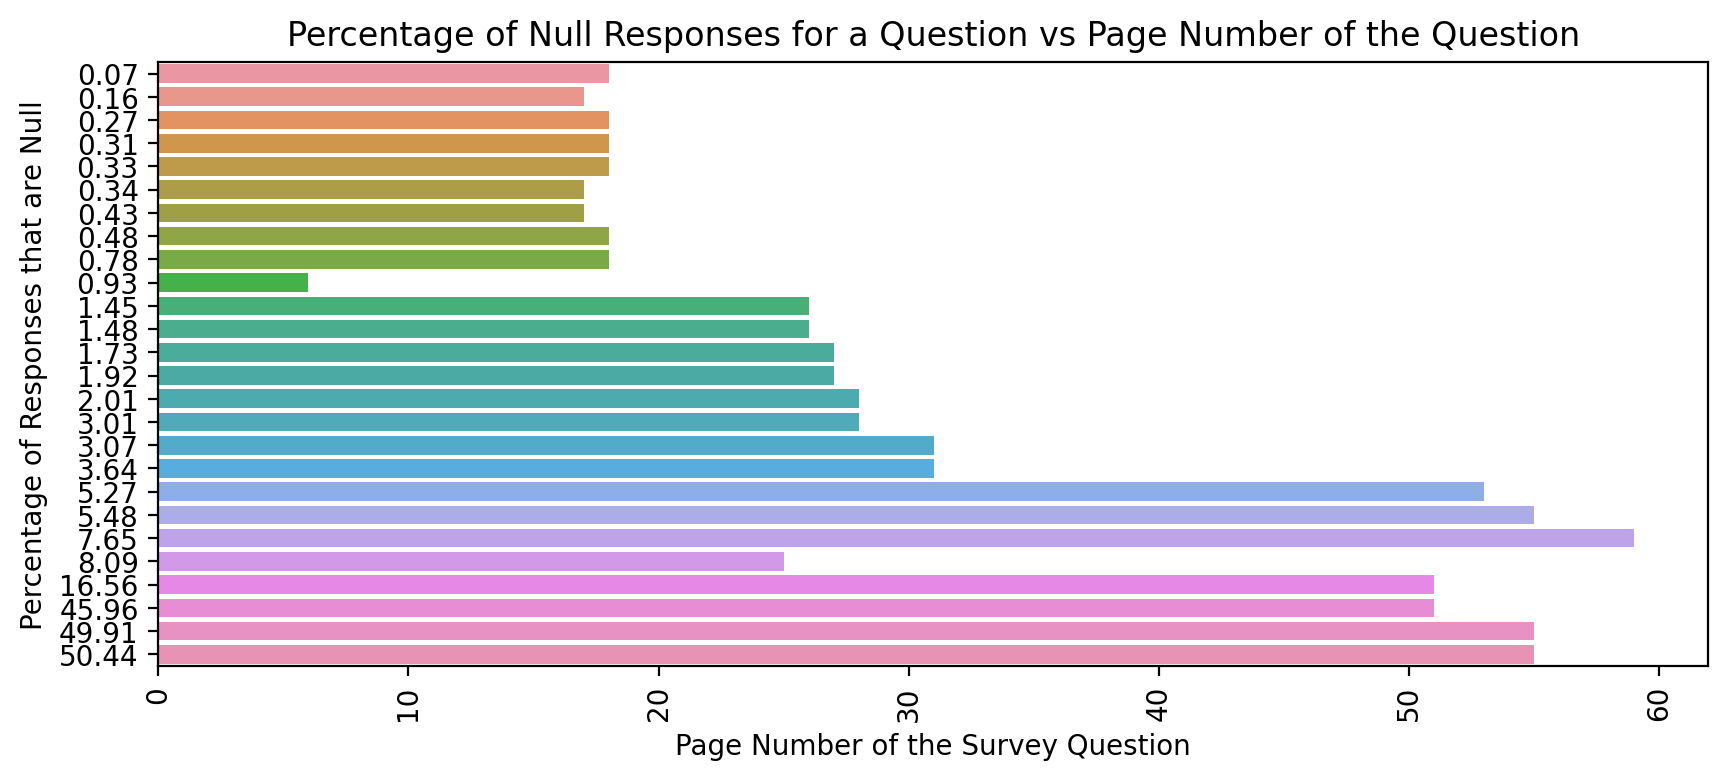

In [7]:
page_num = pd.read_csv('../data/page_num.csv')
page_num["Percent_null"] = (page_num["Number of Nulls"]/26707)*100
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(data=page_num.round(decimals=2),x="Page Number of the Survey",y="Percent_null",orient="h")
plt.xlabel('Page Number of the Survey Question')
plt.ylabel('Percentage of Responses that are Null')
plt.title('Percentage of Null Responses for a Question vs Page Number of the Question')

plt.xticks(rotation=90);

### Take a look at the distribution of the Target Variable 

In the training data set:

   21% received the H1N1 vaccine
   79% did not receive the H1N1 vaccine
     
  53% received the seasonal vaccine
  47% did not receive the seasonal vaccine


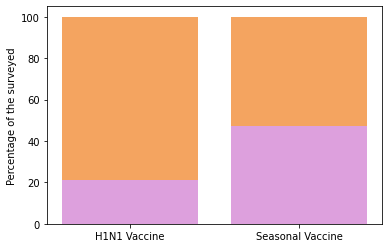

In [31]:
x = ['H1N1 Vaccine', 'Seasonal Vaccine']
y1 = [21, 47]
y2 = [79, 53]
  
# plot bars in stack manner
plt.bar(x, y1, color='plum')
plt.bar(x, y2, bottom=y1, color="sandybrown")
plt.ylabel("Percentage of the surveyed")
plt.show()

The two target variables have been shown to have statistically significant dependance. 


The probability that a randomly selected respondent:  
 Received the seasonal vaccine is  47%
 Received the seasonal vaccine given they received the H1N1 vaccine is 82% 


From the bar plot, the target variables appear to be dependent.  <br> * The probability of a surveyed individual getting a H1N1 vaccine is 21%.  <br> * The probability of a surveyed individual getting a H1N1 vaccine, given that they also got the seasonal vaccine is 37%.  <br> * The probability of a surveyed individual getting a seasonal flu vaccine is 46%. <br> * The probability of a surveyed individual getting a seasonal flu vaccine, given that they also got the H1N1 vaccine is 82%.  <br> 

In [9]:
eg = pd.read_csv('../data/Contingency_targets.csv')
eg.set_index('index',inplace=True)

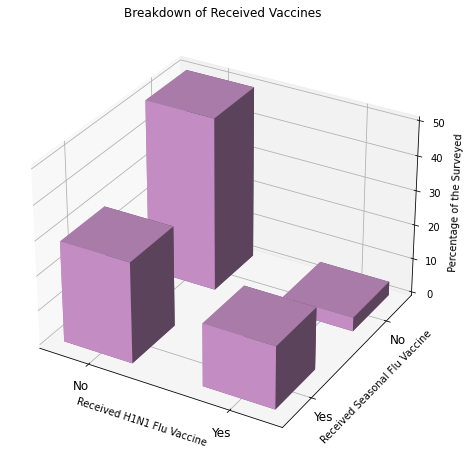

In [14]:
eg = pd.read_csv('../data/Contingency_targets.csv')
eg.set_index('index',inplace=True)
from mpl_toolkits.mplot3d import Axes3D

# thickness of the bars
dx, dy = .5, .5

# prepare 3d axes
fig = plt.figure(figsize=(10,6))
ax = Axes3D(fig)

# set up positions for the bars 
xpos=np.arange(eg.shape[0])
ypos=np.arange(eg.shape[1])

# set the ticks in the middle of the bars
ax.set_xticks(xpos + dx/2)
ax.set_yticks(ypos + dy/2)

# create meshgrid 
# print xpos before and after this block if not clear
xpos, ypos = np.meshgrid(xpos, ypos)
xpos = xpos.flatten()
ypos = ypos.flatten()

# the bars starts from 0 attitude
zpos=np.zeros(eg.shape).flatten()

# the bars' heights
dz = eg.values.ravel()

# plot 
ax.bar3d(xpos,ypos,zpos,dx,dy,dz,color="plum")

# put the column / index labels
ax.w_yaxis.set_ticklabels(eg.columns,fontsize=12,rotation=0)
ax.w_xaxis.set_ticklabels(eg.index,fontsize=12)

# name the axes
ax.set_facecolor('white')
ax.set_xlabel('Received H1N1 Flu Vaccine')
ax.set_ylabel('Received Seasonal Flu Vaccine')
ax.set_zlabel('Percentage of the Surveyed')
#plt.tight_layout()
plt.title("Breakdown of Received Vaccines")
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.show()

There is statistically significant dependence between respondents’ perceived risk of the H1N1 vaccine and whether or  not they chose to receive it. 


The probability that a randomly selected respondent:  
 Received the H1N1 vaccine is  21%
 Received the H1N1 vaccine given they  found it to be very risky or somewhat risky vaccine is 13% 


In [10]:
eg = pd.read_csv('../data/Contingency_targets_h1n1_risk.csv')
eg.set_index('index',inplace=True)

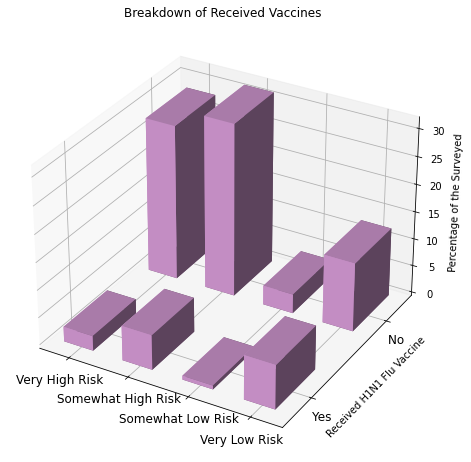

In [11]:
eg = pd.read_csv('../data/Contingency_targets_h1n1_risk.csv')

eg.set_index('index',inplace=True)
from mpl_toolkits.mplot3d import Axes3D

# thickness of the bars
dx, dy = .5, .5

# prepare 3d axes
fig = plt.figure(figsize=(10,6))
ax = Axes3D(fig)

# set up positions for the bars 
xpos=np.arange(eg.shape[0])
ypos=np.arange(eg.shape[1])

# set the ticks in the middle of the bars
ax.set_xticks(xpos + dx/2)
ax.set_yticks(ypos + dy/2)

# create meshgrid 
# print xpos before and after this block if not clear
xpos, ypos = np.meshgrid(xpos, ypos)
xpos = xpos.flatten()
ypos = ypos.flatten()

# the bars starts from 0 attitude
zpos=np.zeros(eg.shape).flatten()

# the bars' heights
dz = eg.values.ravel()

# plot 
ax.bar3d(xpos,ypos,zpos,dx,dy,dz,color="plum")

# put the column / index labels
ax.w_yaxis.set_ticklabels(eg.columns,fontsize=12,rotation=0)
ax.w_xaxis.set_ticklabels(eg.index,fontsize=12)

# name the axes
ax.set_facecolor('white')
#ax.set_xlabel('\n\nRisk of H1N1 Vaccine')
ax.set_ylabel('Received H1N1 Flu Vaccine')
ax.set_zlabel('Percentage of the Surveyed')
#plt.tight_layout()
plt.title("Breakdown of Received Vaccines")
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.show()

In [12]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
import plotly.graph_objects as go
import plotly.offline as pyo

## Graphs for Model Metrics

###  INITIAL MODELS METRICS: H1N1 Vaccine 

Logistic Regression : 
Accuracy: 0.803, AUC: 0.789, Precision: 0.928, Recall: 0.813

XGBoost: 
Accuracy: 0.8518, AUC: 0.730, Precision: 0.879, Recall:  0.942

Neural Network: 
Accuracy: 0.823 , AUC: 0.897, Precision: 0.790, Recall:  0.873


In [22]:
#H1N1 INITIAL MODELS 
categories = [ "Accuracy","AUC", "Precision","Recall" ]
categories = [*categories, categories[0]]
#Logistic Regression Model 
Model_1 = [0.803,0.789,0.928,0.813]
#XGBoost 
Model_2 = [0.8518,0.730,0.879,0.942]
#Neural Network 
Model_3 = [0.823,0.897,0.790,0.873]

Model_1 = [*Model_1, Model_1[0]]
Model_2 = [*Model_2, Model_2[0]]
Model_3 = [*Model_3, Model_3[0]]


fig = go.Figure(
    data=[
        go.Scatterpolar(r=Model_1, theta=categories, fill='toself', name='Model 1'),
        go.Scatterpolar(r=Model_2, theta=categories, fill='toself', name='Model 2'),
        go.Scatterpolar(r=Model_3, theta=categories, fill='toself', name='Model 3')
    ],
    layout=go.Layout(
        title=go.layout.Title(text='Model comparison'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True)
)
fig.update_layout(font=dict(size=18))


fig

###  INITIAL MODELS METRICS: Seasonal Flu Vaccine

Logistic Regression Model: 
Accuracy: 0.803
AUC: 0.789
Precision: 0.928
Recall: 0.813

XGBoost Model : 
Accuracy: 0.8518
AUC: 0.730
Precision: 0.879
Recall:  0.942

Neural Network Model: 
Accuracy: 0.823 
AUC: 0.897
Precision: 0.790
Recall:  0.873


In [23]:
#SEASONAL FLU INITIAL MODELS 
categories = ["Accuracy", "AUC", "Precision","Recall" ]
categories = [*categories, categories[0]]

#Logistic Regression Model 
Model_1 = [0.789,0.788,0.804,0.799]
#XGBoost 
Model_2 = [0.797,0.794,0.800,0.825]

#Neural Network 
Model_3 = [0.800,0.864,0.800,0.834]


Model_1 = [*Model_1, Model_1[0]]
Model_2 = [*Model_2, Model_2[0]]
Model_3 = [*Model_3, Model_3[0]]


fig = go.Figure(
    data=[
        go.Scatterpolar(r=Model_1, theta=categories, fill='toself', name='Model 1'),
        go.Scatterpolar(r=Model_2, theta=categories, fill='toself', name='Model 2'),
        go.Scatterpolar(r=Model_3, theta=categories, fill='toself', name='Model 3')
    ],
    layout=go.Layout(
        title=go.layout.Title(text='Model comparison'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True)
)
fig.update_layout(font=dict(size=18))


fig

### H1N1 Production Model 
XGBoost: Accuracy: 0.8518, AUC: 0.730, Precision: 0.879, Recall: 0.942

XGBoost on abridged survey:
Accuracy: 0.847
AUC: 0.714
Precision: 0.871
Recall:  0.945


In [24]:
#H1N1 PRODUCTION MODELS
categories = [ "Accuracy","AUC", "Precision","Recall" ]
categories = [*categories, categories[0]]
#XGBoost on 15 selected features 
Model_1 = [0.847,0.714,0.871,0.945]
#XGBoost 
Model_2 = [0.8518,0.730,0.879,0.942]

Model_1 = [*Model_1, Model_1[0]]
Model_2 = [*Model_2, Model_2[0]]



fig = go.Figure(
    data=[
        go.Scatterpolar(r=Model_1, theta=categories, fill='toself', name='Model 1'),
        go.Scatterpolar(r=Model_2, theta=categories, fill='toself', name='Model 2'),
        
    ],
    layout=go.Layout(
        title=go.layout.Title(text='Model comparison'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True)
)
fig.update_layout(font=dict(size=18))


fig

### Seasonal  Production Model 
XGBoost: 
Accuracy: 0.797
AUC: 0.794
Precision: 0.800
Recall:  0.825


XGBoost on abridged survey:
Accuracy: 0.849  
AUC: 0.717
Precision: 0.872
Recall:  0.946



In [25]:
#SEASONAL FLU PRODUCTION MODELS 
categories = [ "Accuracy","AUC", "Precision","Recall" ]
categories = [*categories, categories[0]]
#XGBoost on 15 selected features 
Model_1 = [0.849,0.717,0.872,0.946]
#XGBoost 
Model_2 = [0.797,0.794,0.800,0.825]

Model_1 = [*Model_1, Model_1[0]]
Model_2 = [*Model_2, Model_2[0]]



fig = go.Figure(
    data=[
        go.Scatterpolar(r=Model_1, theta=categories, fill='toself', name='Model 1'),
        go.Scatterpolar(r=Model_2, theta=categories, fill='toself', name='Model 2'),
        
    ],
    layout=go.Layout(
        title=go.layout.Title(text='Model comparison'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True)
)
fig.update_layout(font=dict(size=18))


fig